<a href="https://colab.research.google.com/github/dimanchief13-spec/Univercity/blob/main/Tasks/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%2011%20%22%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%80%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_Rasterio_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Работа с растровыми данными в Rasterio**

---

**Данные для обработки:**

- Одноканальное изображение (ЦМР): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Мультиспектральное изображение (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

### **Задание 1. Чтение и исследование растровых данных**



1. Откройте одноканальное изображение ЦМР с использованием `rasterio`.


In [2]:
%%capture
%pip install rasterio fiona folium matplotlib mapclassify

In [3]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)

src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


2. Извлеките и выведите метаданные растра, включая СК, разрешение, границы, количество каналов и типы данных.


In [4]:
print('---------Метаданные---------')
src.meta

---------Метаданные---------


{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [5]:
print('--------Система координат---------')
src.crs

--------Система координат---------


CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [6]:
print('--------Разрешение---------')
src.res

--------Разрешение---------


(90.0, 89.99579177642138)

In [7]:
print('--------Границы---------')
src.bounds

--------Границы---------


BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

In [8]:
print('--------Число каналов---------')
src.count

--------Число каналов---------


1

In [9]:
print('--------Типы данных---------')
src.dtypes

--------Типы данных---------


('int16',)

3. Отобразите ширину и высоту растра, а также типы данных пикселей, чтобы понять размеры сетки и структуру данных.

In [10]:
print('--------Ширина---------')
src.width

--------Ширина---------


4269

In [11]:
print('--------Высота---------')
src.height

--------Высота---------


3113

In [12]:
print('--------Типы данных---------')
src.dtypes

--------Типы данных---------


('int16',)

---



### **Задание 2. Визуализация и манипулирование растровыми каналами**



1. Визуализируйте одноканальное изображение ЦМР с использованием пользовательской цветовой карты (например, cmap='terrain').


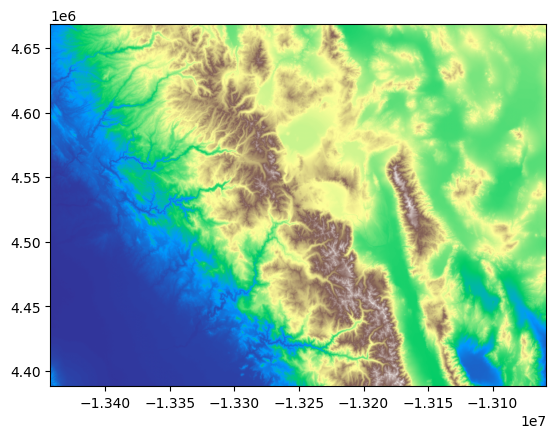

<Axes: >

In [13]:
rasterio.plot.show(src, cmap = 'terrain')

2. Откройте мультиспектральное изображение и визуализируйте первый канал с использованием подходящей цветовой карты.


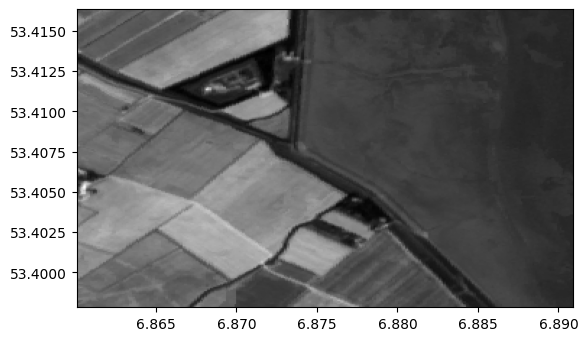

<Axes: >

In [14]:
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
)

src = rasterio.open(raster_path)
rasterio.plot.show((src, 1), cmap="gray")

3. Объедините несколько каналов из мультиспектрального изображения (например, Красный, Зеленый и Синий) и совместите их в один массив для создания RGB-композитного изображения.

In [15]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 343,
 'height': 206,
 'count': 4,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
        0.0, -8.983152841195215e-05, 53.41634207654228)}

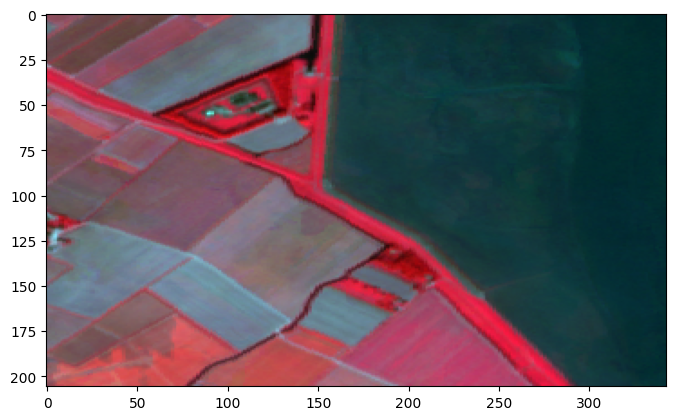

In [16]:
red_band = src.read(4)

green_band = src.read(3)

blue_band = src.read(2)

def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

rgb = np.dstack((normalize(red_band), normalize(green_band), normalize(blue_band)))


plt.figure(figsize=(8, 8))

plt.imshow(rgb)

plt.show()


---



### **Задание 3. Обрезка растра с использованием индексации массива**



1. Откройте мультиспектральное изображение и обрежьте его с использованием спискового среза (указав диапазоны строк и столбцов).


In [37]:
# Открываем растр по указанному пути
src = rasterio.open(raster_path)

# Считываем данные из открытого растра
data = src.read()

subset = data[:, 100:200, 200:300]

rgb_subset = np.dstack((normalize(subset[3]), normalize(subset[2]), normalize(subset[1])))

# Выводим размерность полученного псевдо-RGB изображения
rgb_subset.shape

(100, 100, 3)

2. Визуализируйте обрезанную часть изображения с использованием matplotlib, чтобы убедиться в корректном результате.


>*Примечание:*
>
> При работе с многоканальными растровыми изображениями, особенно в формате COG.TIFF (Cloud Optimized GeoTIFF), может возникнуть проблема с некорректным отображением псевдоцветного изображения. Это связано с тем, что разные каналы могут иметь различные диапазоны значений пикселей.
>
> Для корректной визуализации на шаге 2 необходимо применить нормализацию к каждому каналу перед отображением.



Включите следующую функцию в ваш код:

```python
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
```

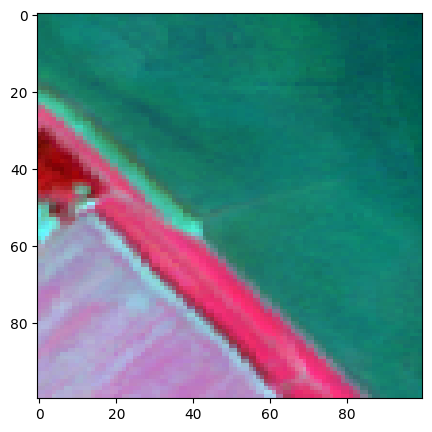

In [18]:
plt.figure(figsize=(5, 5))
plt.imshow(rgb_subset)

plt.show()

3. Сохраните обрезанное подмножество растра в новый файл с именем `clipped_multispectral.tif`.

In [21]:
profile = src.profile.copy()

row_start = 100
row_end = 200
col_start = 200
col_end = 300

subset_height = rgb_subset.shape[0]
subset_width = rgb_subset.shape[1]

profile.update(
    height=subset_height,
    width=subset_width,
    count=rgb_subset.shape[2],
    dtype=rgb_subset.dtype,
)

window = rasterio.windows.Window(col_start, row_start, subset_width, subset_height)
profile["transform"] = src.window_transform(window)

print("Profile updated successfully for saving the clipped image.")

Profile updated successfully for saving the clipped image.


In [23]:
profile.update(compress="lzw")

output_raster_path = "clipped_multispectral.tif"

with rasterio.open(output_raster_path, "w", **profile) as dst:
    # rgb_subset is (height, width, bands), rasterio expects (bands, height, width)
    dst.write(rgb_subset.transpose(2, 0, 1))

print(f"Растровые данные были записаны в файл: {output_raster_path}")

Растровые данные были записаны в файл: clipped_multispectral.tif


---



### **Задание 4. Вычисление NDWI (калькуляция каналов)**



1. Откройте мультиспектральное изображение и извлеките каналы Green (Зеленый) и Ближний инфракрасный (NIR).


In [38]:
green_band_ndwi = src.read(3)
nir_band_ndwi = src.read(1)

2. Вычислите Нормализованный разностный водный индекс ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) по формуле:

    NDWI = (Green - NIR) / (Green + NIR)

In [28]:
ndwi = (green_band_ndwi - nir_band_ndwi) / (green_band_ndwi + nir_band_ndwi)

3. Визуализируйте результат NDWI с использованием цветовой карты, подходящей для воды (например, cmap='Blues'), чтобы выделить водные объекты.


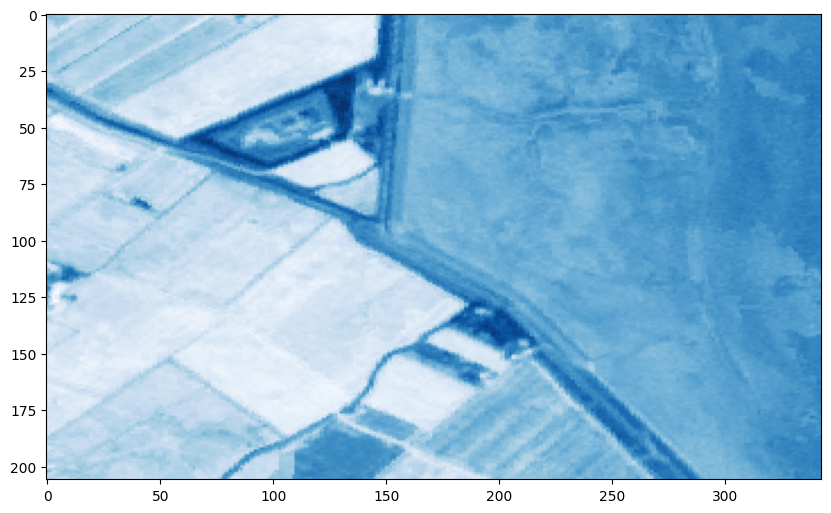

In [33]:
# Визуализируем результат NDWI
plt.figure(figsize=(10, 10))
plt.imshow(ndwi, cmap='Blues')
plt.show()



4. Сохраните полученное изображение NDWI как новый растровый файл с именем ndwi.tif.

In [39]:
with rasterio.open(raster_path) as src:
    profile = src.profile

profile.update(dtype=rasterio.float32, count=1, compress="lzw")

output_raster_path = "ndwi.tif"

with rasterio.open(output_raster_path, "w", **profile) as dst:
    dst.write(ndwi, 1)

print(f"Растровые данные были записаны в файл: {output_raster_path}")

Растровые данные были записаны в файл: ndwi.tif


---



### **Задание 5. Перепроецирование растровых данных**



1. Перепроецируйте одноканальный растр ЦМР из его исходной СК в EPSG:4326 (WGS 84) с использованием функции `rasterio.warp.reproject`.


In [48]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Задаем пути к файлам и целевую систему координат
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
dst_crs = "EPSG:4326"  # Целевая система координат - проекция Web Mercator
output_reprojected_path = "reprojected_dem.tif"

# Открываем исходный растр и вычисляем параметры трансформации
with rasterio.open(raster_path) as src:
    # Рассчитываем параметры трансформации для новой проекции
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )

    # Копируем и обновляем метаданные для нового файла
    profile = src.profile
    profile.update(crs=dst_crs, transform=transform, width=width, height=height)

    # Создаем новый файл и перепроецируем данные
    with rasterio.open(output_reprojected_path, "w", **profile) as dst:
        # Перепроецируем каждый канал растра
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,  # Используем метод ближайшего соседа
            )

# Выводим сообщение об успешном сохранении
print(f"Перепроецированный растр сохранен как: {output_reprojected_path}")

Перепроецированный растр сохранен как: reprojected_dem.tif


2. Сохраните перепроецированный растр в новый файл GeoTIFF с именем `reprojected_dem.tif`.


3. Визуализируйте как исходный, так и перепроецированный наборы данных ЦМР, чтобы сравнить, как перепроецирование влияет на пространственное покрытие и разрешение.

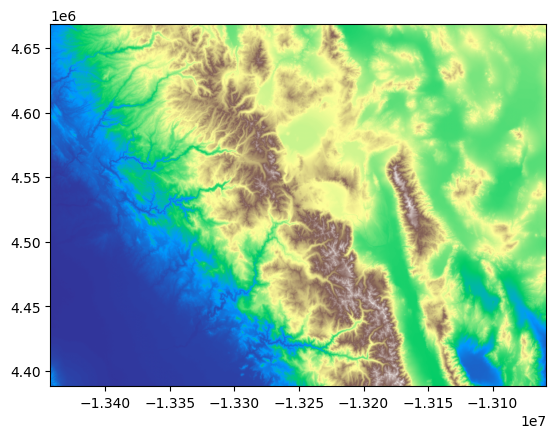

<Axes: >

In [49]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
src = rasterio.open(raster_path)
rasterio.plot.show((src, 1), cmap="terrain")

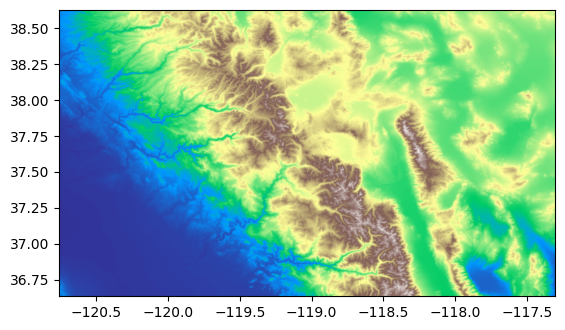

<Axes: >

In [50]:
raster_path = "reprojected_dem.tif"
src = rasterio.open(raster_path)
rasterio.plot.show((src, 1), cmap="terrain")

---